Question 1: What is Simple Linear Regression?
Answer: Simple Linear Regression is a statistical method used to study the relationship between two variables: one independent variable (predictor) and one dependent variable (outcome). It fits a straight line, called the regression line, to the data to show how the dependent variable changes as the independent variable changes. The equation of the line is $Y = \beta_0 + \beta_1X$, where $\beta_0$ is the intercept and $\beta_1$ is the slope. This method is mainly used for prediction and to understand the strength and direction of the relationship between the two variables.


Question 2: What are the key assumptions of Simple Linear Regression?
Answer: The key assumptions of Simple Linear Regression are that the relationship between the independent and dependent variables is linear, the data points are independent, the errors have constant variance (homoscedasticity), and the residuals are normally distributed. These assumptions ensure that the model provides accurate and reliable predictions.



Question 3: What is heteroscedasticity, and why is it important to address in regression models?
Answer:Heteroscedasticity refers to a situation in regression where the variance of the error terms (residuals) is not constant across all levels of the independent variable. In other words, the spread of residuals changes as the value of X changes. This is important to address because heteroscedasticity violates one of the key assumptions of regression, leading to inefficient estimates, unreliable hypothesis tests, and biased standard errors. As a result, the model’s predictions and conclusions may become misleading if heteroscedasticity is ignored.


Question 4: What is Multiple Linear Regression?
Answer: Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. It extends simple linear regression by allowing multiple predictors to explain or predict the outcome. The general equation is:

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_nX_n + \epsilon
$$

Here, $Y$ is the dependent variable, $X_1, X_2, \ldots, X_n$ are independent variables, $\beta_0$ is the intercept, $\beta_1, \beta_2, \ldots, \beta_n$ are coefficients showing the impact of each predictor, and $\epsilon$ is the error term. This method is widely used for prediction and to understand how several factors together influence the outcome.



Question 5: What is polynomial regression, and how does it differ from linear
regression?
Answer: Polynomial regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an $n$-th degree polynomial. Unlike simple linear regression, which fits a straight line to the data, polynomial regression can capture curved relationships by including higher-order terms (e.g., $X^2, X^3$).

For example:

$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \cdots + \epsilon
$$

**Difference:** Linear regression assumes a straight-line relationship, while polynomial regression allows for non-linear, curved relationships, making it more flexible in fitting complex patterns in data.



Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points
Answer:




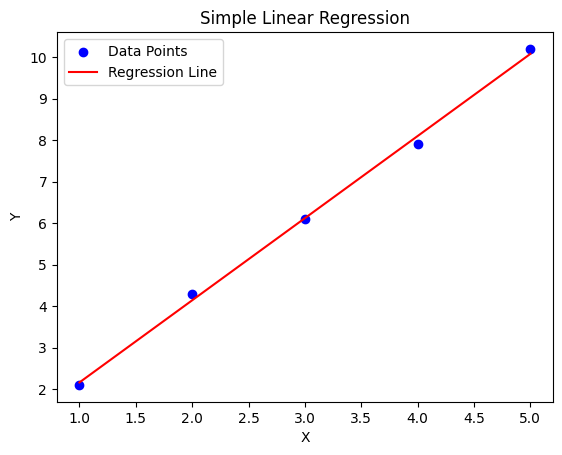

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plot data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
Answer.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

# Independent (X) and dependent (Y) variables
X = df[["Area", "Rooms"]]
Y = df["Price"]

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF):
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


Explanation:

VIF measures multicollinearity (how strongly predictors are correlated).

Rule of thumb:

VIF = 1 → No multicollinearity.

VIF < 5 → Acceptable.

VIF > 10 → Serious multicollinearity problem.

With this small dataset, you’ll likely see high VIF values because Area and Rooms are correlated (larger houses often have more rooms).

Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


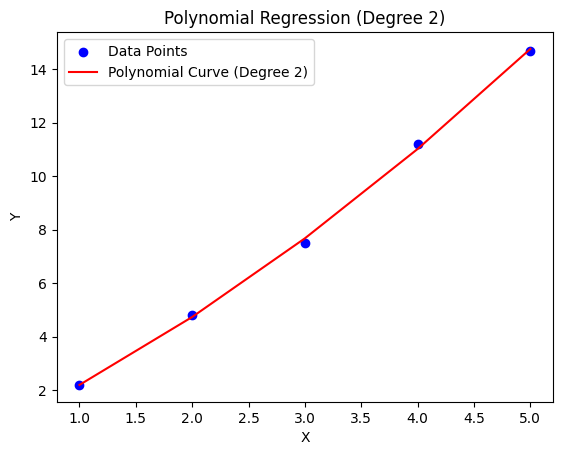

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features for polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Plot data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot polynomial curve
plt.plot(X, Y_pred, color='red', label='Polynomial Curve (Degree 2)')

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
Answer:

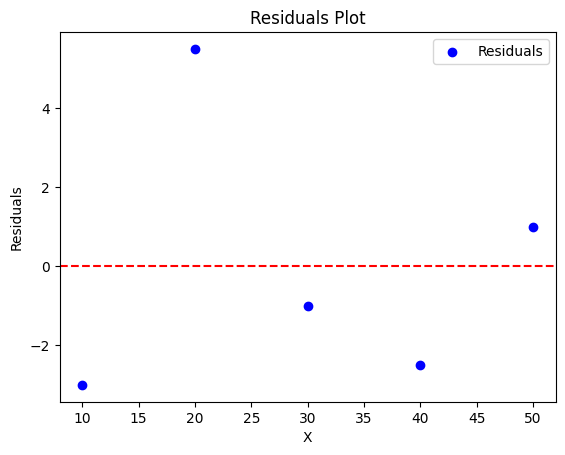

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit regression model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')

# Labels and title
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()


Interpretation:

In a good regression model, residuals should be randomly scattered around zero with no clear pattern.

If the spread of residuals increases or decreases with X, it indicates heteroscedasticity.

For this small dataset, you can visually check if the residuals spread out unevenly.

Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.
Answer:To address heteroscedasticity and multicollinearity in a regression model, I would follow these steps:

First, for heteroscedasticity, I would apply a transformation to the dependent variable (e.g., log or square root) to stabilize variance. If the issue persists, I would consider using Weighted Least Squares (WLS) or robust regression techniques that can handle non-constant variance. Additionally, I would check whether important variables are missing, as omission can sometimes cause heteroscedasticity.

For multicollinearity, I would calculate the Variance Inflation Factor (VIF) to identify highly correlated predictors. If some features are strongly correlated, I would remove redundant variables, combine them into a single feature (e.g., area per room), or use dimensionality reduction techniques like Principal Component Analysis (PCA). Another option is to apply regularization methods such as Ridge or Lasso regression, which reduce the impact of multicollinearity by penalizing large coefficients.

By applying these techniques, the model would become more reliable, ensuring accurate predictions and valid interpretations.